# Linear Regression
This has been taken directly from http://connor-johnson.com/2014/02/18/linear-regression-with-python/

However, I believe that the current format makes a quick reference for the statistics involved in linear regression.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from statsmodels.formula import api as sm
from sklearn.linear_model import LinearRegression
import scipy as sc
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 7)

### Data

In [2]:
data_str = '''Region	Alcohol	Tobacco
North	6.47	4.03
Yorkshire	6.13	3.76
Northeast	6.19	3.77
East Midlands	4.89	3.34
West Midlands	5.63	3.47
East Anglia	4.52	2.92
Southeast	5.89	3.20
Southwest	4.79	2.71
Wales	5.27	3.53
Scotland	6.08	4.51
Northern Ireland	4.02	4.56'''

In [3]:
d = data_str.splitlines()
data = [i.split('\t') for i in d]

In [4]:
for i in range(len(data)):
    for j in range(len(data[0])):
        try:
            data[i][j] = float(data[i][j])
        except:
            pass

In [5]:
df = DataFrame(data[1:], columns=data[0])

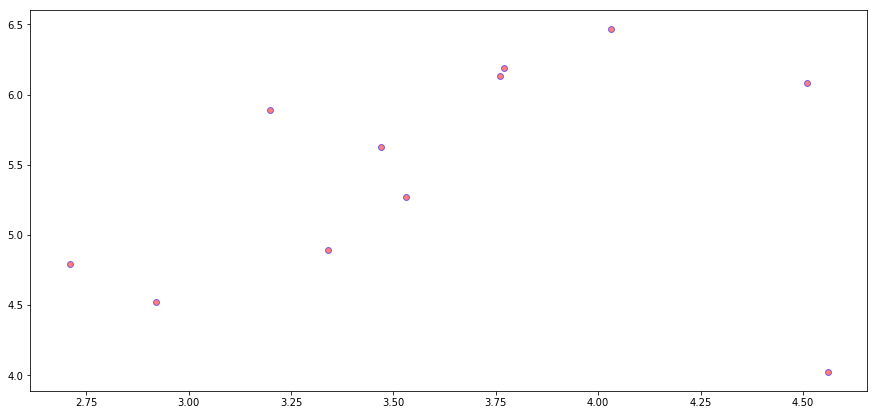

In [6]:
plt.scatter(df.Tobacco, df.Alcohol, marker='o', edgecolors='b', facecolor='r', alpha=0.5)

In [7]:
df['Ones'] = np.ones(df.shape[0])

### Regression using statsmodels

In [8]:
# Treating Northern Ireland as an outlier
Y = df.Alcohol[:-1]
X = df[['Tobacco', 'Ones']][:-1]

In [9]:
model_one = sm.OLS(Y, X).fit()

In [10]:
model_one.summary()

/home/ratnadeepb/app/miniconda3/envs/2bytz/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sat, 15 Jul 2017   Prob (F-statistic):            0.00723
Time:                        12:22:16   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tobacco        1.0059      0.281      3.576      0.007       0.357       1.655
Ones           2.0412      1.001      2.038      0.076      -0.268       4.350
==============================================================================
Omnibus:                        2.542   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                0.904
Skew:                          -0.014   Prob(JB):                        0.636
Kurtosis:                       1.527   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### F-Statistics
The null hypothesis is that all coefficients are zero. Alternate hypothesis is that at leas one is non-zero.
 \begin{equation*} F = \dfrac{\dfrac{SSM/\sigma^{2}}{P}}{\dfrac{SSE/\sigma^{2}}{N-P-1}} = \dfrac{MSM}{MSE} \end{equation*} 

 \begin{equation*} MSE = \dfrac{1}{N-P-1} \displaystyle \sum_{i=1}^{N} ( y_{i} - \hat{y_{i}} )^{2} \end{equation*} 
\begin{equation*} MSM = \dfrac{1}{P} \displaystyle \sum_{i=1}^{N} ( \hat{y_{i}} - \bar{y} )^{2} \end{equation*} 

In [11]:
N = model_one.nobs  # Number of observations
P = model_one.df_model  # Model degrees of freedom
dfn, dfd = P, (N - P - 1)
F = model_one.mse_model / model_one.mse_resid  # F = MSM / MSE
p = 1 - stats.f.cdf(F, dfn, dfd)
print("F-statistics: {:.3f}, p-value: {:.5f}".format(F, p))

F-statistics: 12.785, p-value: 0.00723


### Log-Likelihood

 \begin{equation*} \mathcal{L} = \displaystyle \prod_{i=1}^{N} \biggl(\dfrac{1}{\sqrt{2\pi\sigma^{2}}}\biggr) \exp\biggl(-\displaystyle \sum_{i=1}^{N} \dfrac{(y_{i}-\hat{y}_{i})^{2}}{2\sigma^{2}}\biggr) \end{equation*} 

 \begin{equation*} \ln(\mathcal{L}) = \displaystyle \sum_{i=1}^{N} \ln\biggl(\dfrac{1}{\sqrt{2\pi\sigma^{2}}}\biggr) - \dfrac{1}{2\sigma^{2}} \displaystyle \sum_{i=1}^{N} (y_{i}-\hat{y}_{i})^{2} \end{equation*} 

In [12]:
SSR = model_one.ssr  # Sum of Squared Residuals
s2 = SSR / N  # Sample Variance
L = (1 / np.sqrt(2 * np.pi * s2)) ** N * np.exp(-SSR / (s2 * 2))
print("ln(L): ", np.log(L))

ln(L):  -4.99975869739


### AIC and BIC

Akaike Information Criterion and Bayesian Information Criterion introduce penalty for model complexity, but AIC penalizes less severely.

\begin{equation*} AIC = 2 k - 2\ln( \mathcal{L} ) \end{equation*} 
\begin{equation*} BIC = k \ln(N) - 2\ln( \mathcal{L} ) \end{equation*} 
  
k --> Number of parameters

AIC is the comparative loss of information between two models. BIC was proposed using Bayesian arguments. So we would want to select a model with a lower AIC or BIC number.

### Standard Error

\begin{equation*} C = cov(\beta) = \sigma^{2} ( X X^{T} )^{-1}. \end{equation*} 

Standard Errors are the square roots of the main diagonal of this matrix.

In [13]:
X = np.matrix(X)
C = model_one.mse_resid * np.linalg.inv(X.T * X)
SE = np.sqrt(C)
SE

/home/ratnadeepb/app/miniconda3/envs/2bytz/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


matrix([[ 0.28132158,         nan],
        [        nan,  1.00136021]])

### T-statistics
It is used to test the importance of individual predictors. It is true when individual errors are zero mean normal distribution. Otherwise there may be interaction between the predictors and t-statistics should not be used.

 \begin{equation*} t_{i} = \beta_{i} / SE_{i,i} \end{equation*} 

In [14]:
i = 0
beta = model_one.params[i]
se = SE[i, i]
t = beta / se
t

3.5756084542390614

In [15]:
hp = 1 - stats.t(dfd).cdf(t)
p_t = hp * 2
p_t  # Two-tailed probability

0.0072343583517291421

### Confidence Intervals
 \begin{equation*} CI = [ \beta_{i} - z \cdot SE_{i,i}, \beta_{i,i} + z \cdot SE_{i,i} ] \end{equation*} 

In [16]:
z = stats.t(dfn).ppf(0.975)
limit = z * se
CI = [beta - limit, beta + limit]
CI

[-2.5686338044472228, 4.580425469124739]

### Skewness and Kurtosis
Asymmetry and Curvature (peakedness).

\begin{equation*} S = \dfrac{\hat{\mu}_{3}}{\hat{\sigma}^{3}} = \dfrac{ \frac{1}{N} \displaystyle \sum_{i=1}^{N} ( y_{i} - \hat{y}_{i} )^{3} }{ \biggl( \frac{1}{N} \displaystyle \sum_{i=1}^{N} ( y_{i} - \hat{y}_{i} )^{2} \biggr)^{3/2}} \end{equation*} 

\begin{equation*} K = \dfrac{\hat{\mu}_{4}}{\hat{\sigma}^{4}} = \dfrac{ \frac{1}{N} \displaystyle \sum_{i=1}^{N} ( y_{i} - \hat{y}_{i} )^{4} }{ \biggl( \frac{1}{N} \displaystyle \sum_{i=1}^{N} ( y_{i} - \hat{y}_{i} )^{2} \biggr)^{2}} \end{equation*} 

In [17]:
d = Y - model_one.fittedvalues
S = np.mean(d**3) / (np.mean(d**2) ** (3/2))
K = np.mean(d**4) / (np.mean(d**2) ** 2)
"Skewness: {}, Kurtosis: {}".format(S, K)

'Skewness: -0.01367812591004447, Kurtosis: 1.5271300905736012'

### Omnibus Test
This test uses skewness and kurtosis to check if a distribution is normal. We can use this to look at the distribution of the residual. If the Omnibus test value is small then residuals are not normally distributed.

The following uses the K2 test by D'Agostino, Belanger and a correction by Royston.

In [18]:
def Z1(s, n):
    Y = s * np.sqrt( ( ( n + 1 )*( n + 3 ) ) / ( 6.0 * ( n - 2.0 ) ) )
    b = 3.0 * ( n**2.0 + 27.0*n - 70 )*( n + 1.0 )*( n + 3.0 )
    b /= ( n - 2.0 )*( n + 5.0 )*( n + 7.0 )*( n + 9.0 )
    W2 = - 1.0 + np.sqrt( 2.0 * ( b - 1.0 ) )
    alpha = np.sqrt( 2.0 / ( W2 - 1.0 ) )
    z = 1.0 / np.sqrt( np.log( np.sqrt( W2 ) ) )
    z *= np.log( Y / alpha + np.sqrt( ( Y / alpha )**2.0 + 1.0 ) )
    return z
 
def Z2(k, n):
    E = 3.0 * ( n - 1.0 ) / ( n + 1.0 )
    v = 24.0 * n * ( n - 2.0 )*( n - 3.0 )
    v /= ( n + 1.0 )**2.0*( n + 3.0 )*( n + 5.0 )
    X = ( k - E ) / np.sqrt( v )
    b = ( 6.0 * ( n**2.0 - 5.0*n + 2.0 ) ) / ( ( n + 7.0 )*( n + 9.0 ) )
    b *= np.sqrt( ( 6.0 * ( n + 3.0 )*( n + 5.0 ) ) / ( n * ( n - 2.0 )*( n - 3.0 ) ) )
    A = 6.0 + ( 8.0 / b )*( 2.0 / b + np.sqrt( 1.0 + 4.0 / b**2.0 ) )
    z = ( 1.0 - 2.0 / A ) / ( 1.0 + X * np.sqrt( 2.0 / ( A - 4.0 ) ) )
    z = ( 1.0 - 2.0 / ( 9.0 * A ) ) - z**(1.0/3.0)
    z /= np.sqrt( 2.0 / ( 9.0 * A ) )
    return z
 
K2 = Z1(S, N) ** 2 + Z2(K, N) ** 2
K2

2.5418981690649525

K2 statistics has roughly $\chi^{2}$ distribution with 2 degrees of freedom, so p-value can be calculated as:

In [19]:
p_omnibus = 1 - stats.chi2(2).cdf(K2)
p_omnibus

0.28056521527106471

### Durbin-Watson
This is a test for autocorrelation by separating the residuals with some lag (eg. 1).
\begin{equation*} DW = \dfrac{ \displaystyle \sum_{i=2}^{N} ( ( y_{i} - \hat{y}_{i} ) - ( y_{i-1} - \hat{y}_{i-1} ) )^{2} }{ \displaystyle \sum_{i=1}^{N} ( y_{i} - \hat{y}_{i} )^{2} } \end{equation*} 

DW = 2(1 - r) where r is the sample autocorrelation. The value ranges from 0 to 4. A value around 2 suggests no autocorrelation. A value greater than 2 suggests negative correlation. A value less than 1 suggests positive correlation.

In [20]:
DW = np.sum(np.diff(model_one.resid.values) ** 2) / model_one.ssr
DW

1.9753463429714684

### Jarque-Bera Test
H0 := S = 0; K = 3 (Normal)

However, the small sample JB Test tends to reject H0 even if it is true.
\begin{equation*} JB = \dfrac{N}{6} \biggl( S^{2} + \dfrac{1}{4}(K-3)^{2} \biggr) \end{equation*} 

In [21]:
JB = (N / 6) * ((S ** 2) + (1/4) * ((K - 3) ** 2))
JB

0.90420588941973845

Calculating the probability using the $\chi^{2}$ distribution with two degrees of freedom we have,

In [22]:
p_JB = 1 - stats.chi2(2).cdf(JB)
p_JB

0.63628866380151261

### Condition Number
Square root of the ratio of the largest eigenvalue to the smallest eigenvalue. Condition number > 30 => multicolinearity

In [23]:
EV = np.linalg.eigvals(X.T * X)
EV

array([ 136.51527115,    0.18412885])

In [24]:
CN = np.sqrt(EV.max() / EV.min())
CN

27.228874902064931